# 데이터 전처리

### 최종 코드

- 특수문자, 기호, 한글 초성 제거

In [107]:
# Setting

import pandas as pd
import re



def text_preprocessing(df_reviews):
    """Review_Text의 리뷰글을 전처리 하는 함수"""
    for i in range(len(df_reviews)):
        text = df_reviews['Review_Text'][i]
    
        if not isinstance(text, str):
            text = str(text)
        temp = re.sub('[^가-힣a-zA-Z0-9\s]', '',text)

        df_reviews.loc[[i],['Review_Text']] = temp
        
    df_reviews['Review_Text'] = df_reviews['Review_Text'].str.replace('\n','')
    df_reviews = df_reviews.drop('Unnamed: 0', axis = 1)
    # df_reviews['Review_Text'] = df_reviews['Review_Text'].str.replace('nan', '')
    df_reviews.drop(df_reviews[df_reviews['Review_Text'] == 'nan'].index, inplace=True)
    df_reviews.drop(df_reviews[df_reviews['Review_Text'] == ''].index, inplace=True)
    df_reviews.to_csv('./S_hotel_buffet_review_data_preprocess.csv')
    
    return df_reviews

In [108]:
# 실행
shilla_hotel_buffet_review = pd.read_csv("C:/Users/pps/Desktop/Restaurant_Review/Data_Collect/shilla_hotel_buffet_review_original.csv", encoding='utf-8')

S_hotel_buffet_preprocess_review = text_preprocessing(shilla_hotel_buffet_review)

- 맞춤법 확인

In [109]:
# Setting
from hanspell import spell_checker

requestURL = "https://m.search.naver.com/p/csearch/ocontent/util/SpellerProxy?passportKey=90ae3cbdae22968de3f12b9095f35ea488ecf40b&_callback=jQuery112406350187405022272_1718946457167&q=%EB%A7%9E%EC%B6%A4%EB%B2%95+%EA%B2%80%EC%82%AC%EB%A5%BC+%EC%9B%90%ED%95%98%EB%8A%94+%EB%8B%A8%EC%96%B4%EB%82%98+%EB%AC%B8%EC%9E%A5%EC%9D%84+%EC%9E%85%EB%A0%A5%ED%95%B4+%EC%A3%BC%EC%84%B8%EC%9A%94.&where=nexearch&color_blindness=0&_=1718946457168"

def ReviewSpellChecker(df_reviews):
    """Review_Text의 맞춤법 고치는 함수"""
    for i in range(len(df_reviews)):
        sentence = df_reviews['Review_Text'][i]
        if len(sentence) > 0:
            result = spell_checker.check(df_reviews['Review_Text'][i], requestURL).checked
        else:
            result = ""
        df_reviews.loc[i, 'Review_Text'] = result
        
    df_reviews = df_reviews.drop('Unnamed: 0', axis = 1)
    df_reviews.to_csv('./S_hotel_buffet_review_spellchecker.csv')
    return df_reviews

In [110]:
# 실행

buffet_preprocess_review = pd.read_csv("C:/Users/pps/Desktop/Restaurant_Review/Data_Preprocessing/S_hotel_buffet_review_data_preprocess.csv")
buffet_spellchecker_review = ReviewSpellChecker(buffet_preprocess_review)

- spacing 확인

In [225]:
# Setting
from pykospacing import Spacing
spacing = Spacing()

def checkSpacing(df_reviews):
    """Review_Text의 띄어쓰기 오류 고치는 함수"""
    for i in range(len(df_reviews)):
        print(i, df_reviews["Review_Text"][i])
        test_space = spacing(df_reviews["Review_Text"][i])
        df_reviews.loc[i, 'Review_Text'] = test_space
    df_reviews = df_reviews.drop('Unnamed: 0', axis = 1)
    df_reviews.to_csv('./S_hotel_buffet_review_spacingcheck.csv')
    return df_reviews

In [226]:
# 실행

spellchecker_review = pd.read_csv("C:/Users/pps/Desktop/Restaurant_Review/Data_Preprocessing/S_hotel_buffet_review_spellchecker.csv")
spacingcheck_review = checkSpacing(spellchecker_review)


0 신라호텔에 오면 정말 꼭 해야 할 꿀팁 정리했습니다 1 발레를 꼭 하세요 제휴카드가 있으면 무료지만 제휴카드가 없더라도 33000원 결제 시 가발 넷을 해주시고요 체크인 시간 아깝고 주차장에서 왔다 갔다 짐 옮기기 어려운 모든 걸 해결할 수 있습니다 여기서 꿀팁은 체크아웃전 전화로 0번 눌러서 차 번호 알려주시면 미리 빼주십니다 일층 내려와서 차 빼달라고 하면 1520분 걸려요 2 신라호텔 바로 주변 택시 타고 기본요금 차로도 주차 가능한 맛집 중 맛집 신라호텔이 비싸서 가성비 혹은 멋진 공간들을 찾으신다면 을지로에 위치한 행 2PM 8PM 추천드립니다 매일 저녁 인디 가수들의 라이브 공연도 매일 하고 와인이나 맥주 술도 저렴 라자냐 파스타와 몽둥이 고기가 유명한 곳이라 저녁에 코스로 들르기 좋은 곳이에요
1 직원분들 너무 친절하시고 음식 맛은 대한민국 호텔 뷔페 넘버원인데 말해 뭐 해입니다 조금씩 일찍 입장시켜주시는 융통성도 좋아요 쪼금 아쉬운 건 의외로 과일류 구색이 약하다는 거
2 종류도 알차게 많고 다 맛있어요
3 신라호텔 파크뷰 조식 이용했습니다 11층이라 뷰도 훌륭하고 객실 컨디션이나 청결 서비스 상태 좋고 직원분들이 매우 친절하시고 어디에나 어느 곳이든 다 상주해계셔서 호텔 서비스 이용하는데 매우 편했습니다 물론 5성급 호텔이라서 숙박비나 발레파킹 비용이 비싼 편이지만 돈 쓰러 오는 곳인 만큼 가치 있어요
4 창가 자리는 보기만 하고 부스 좌석 안내받음 안락하고 좋았어요 대게는 차갑고 짜고 짜장면 도삭면은 불어있고 문어숙회는 너무 안 익은 느낌 양 갈비 맛있었어요 딸기 달달 한라봉 새콤달콤 약 15분 정도 일찍 입장해서 좋았지만 모든 음식 코너에 긴 줄 디저트부터 시작했네요 직원분들 서비스가 너무 좋아서 모든 게 커버되는 거 같아요
5 항상 친절하시고 음식도 맛있네요
6 분위기도 너무 좋고 음식 하나하나 다 만족해하며 맛있게 먹고 왔습니다 샐러드 킹크랩 스시 모든 재료가 싱싱하고 맛있습니다 고기 디저트로 버 분들 여기 무조건 추천드립니다 만족한

- 문장의 길이 확인하여 이상치를 찾고 이상치 제거

In [129]:
# Setting
import pandas as pd


def find_reviewlength(df_reviews):
    """리뷰글의 길이를 추출하는 함수"""
    review_strlength = {"리뷰 길이":[]}
    for i in range(len(df_reviews)):
        temp_length = len(df_reviews["Review_Text"][i])
        review_strlength["리뷰 길이"].append(temp_length)
        
    df_temp_review_strlength = pd.DataFrame(review_strlength)
    return df_temp_review_strlength

def find_IQR(df_length_reviews,df_reviews):
    """IQR방식을 이용한 이상치를 찾아 제거하는 함수"""
    new_df_length = df_length_reviews.copy()
    new_df_reviews = df_reviews.copy()
    Q1 = new_df_length["리뷰 길이"].quantile(q=0.25)
    Q3 = new_df_length["리뷰 길이"].quantile(q=0.75)
    IQR = Q3 - Q1
    IQR_df = new_df_length[(new_df_length["리뷰 길이"] >= Q3 + 1.5 * IQR) | (new_df_length["리뷰 길이"] <= Q1 - 1.5*IQR)].index
    
    new_df_reviews = new_df_reviews.drop('Unnamed: 0.1', axis = 1)
    new_df_reviews = new_df_reviews.drop('Unnamed: 0', axis = 1)
    
    new_df_reviews.drop(IQR_df, inplace = True)
    new_df_reviews.reset_index(drop=True, inplace = True)
    
    new_df_reviews.to_csv("./S_hotel_buffet_review_IQR.csv")
    return new_df_reviews
    


In [130]:
# 실행
spacingchecker_review = pd.read_csv("C:/Users/pps/Desktop/Restaurant_Review/Data_Preprocessing/S_hotel_buffet_review_spacingcheck.csv")
s_hotel_buffet_review_strlength = find_reviewlength(spacingchecker_review)
s_hotel_buffet_review_outlier = find_IQR(s_hotel_buffet_review_strlength, spacingchecker_review)

171


---

### 연습

In [49]:
import pandas as pd

In [50]:
df_reviews = pd.read_csv("C:/Users/pps/Desktop/Restaurant_Review/Data_Collect/shilla_hotel_buffet_review_original.csv", encoding='utf-8')

In [185]:
temp_reviews = pd.read_csv("C:/Users/pps/Desktop/Restaurant_Review/Data_Collect/shilla_hotel_buffet_review_original.csv", encoding='utf-8')

In [6]:
temp_reviews['Review_Text'][0]

'신라호텔에 오면 정말 꼭 해야할 꿀팁 정리했습니다! 1. 발렛을 꼭하세요! 제휴카드가 있으면 무료지만 제휴카드가 없더라도 33000원 결제시 가발렛을 해주시고요, 체크인시간 아깝고, 주차장에서 왔다갔다, 짐옮기기 어려운 모든걸 해결할수있습니다. 여기서 꿀팁은 체크아웃전 전화로 0\n번 눌러서 차번호 알려주시면 미리 뺴주십니다. 일층내려와서 차뺴달라고하면 15~20분 걸려요! 2. 신라호텔 바로 주변 택시타고 기본요금, 차로도 주차가능한 맛집 중 맛집, 신라호텔이 비싸서 가성비 혹은 멋진 공간들을 찾으신다면, 을지로에 위치한 행2PM8PM 추천드립니다. 매일저녁\n 인디가수들의 라이브공연도 매일하고, 와인이나 맥주, 술도 저렴, 라자냐파스타와 몽둥이고기가 유명한곳이라 저녁에 코스로 들르기 좋은곳이에요!'

In [28]:
import re

cleaned_reviews1 = []
cleaned_reviews2 = []
cleaned_reviews3 = []
for i in range(len(temp_reviews)):
    text = temp_reviews['Review_Text'][i]
    
    if not isinstance(text, str):
        text = str(text)
    temp = re.sub('[^가-힣a-zA-Z0-9\s]', '',text)
    # temp = re.sub('[ㄱ-하-ㅣ]', '', text)
    # temp = re.sub('[^\w\s]', '', text)
    # temp = re.sub('[ㄱ-ㅎ()]', '',text)
    # temp = re.sub('[\n]', '', text)
    # temp = re.sub(r"\n", '', text)
    # temp = re.sub('[^,.?!\w\s]', '', text)
    print(temp)
    temp_reviews.loc[[i],['Review_Text']] = temp
    # cleaned_reviews2.append(temp)
    # cleaned_reviews3.append(temp)

신라호텔에 오면 정말 꼭 해야할 꿀팁 정리했습니다 1 발렛을 꼭하세요 제휴카드가 있으면 무료지만 제휴카드가 없더라도 33000원 결제시 가발렛을 해주시고요 체크인시간 아깝고 주차장에서 왔다갔다 짐옮기기 어려운 모든걸 해결할수있습니다 여기서 꿀팁은 체크아웃전 전화로 0
번 눌러서 차번호 알려주시면 미리 뺴주십니다 일층내려와서 차뺴달라고하면 1520분 걸려요 2 신라호텔 바로 주변 택시타고 기본요금 차로도 주차가능한 맛집 중 맛집 신라호텔이 비싸서 가성비 혹은 멋진 공간들을 찾으신다면 을지로에 위치한 행2PM8PM 추천드립니다 매일저녁
 인디가수들의 라이브공연도 매일하고 와인이나 맥주 술도 저렴 라자냐파스타와 몽둥이고기가 유명한곳이라 저녁에 코스로 들르기 좋은곳이에요
직원분들 너무 친절하시고 음식맛은 대한민국 호텔부페 넘버원인데 말해뭐해 입니다 조금씩 일찍 입장 시켜주시는 융통성도 좋아요 쬐끔 아쉬운건 의외로 과일류 구색이 약하다는 거
종류도 알차게 많고 다 맛있어요
신라호텔 파크뷰 조식 이용했습니다
11층이라 뷰도 훌륭하고 객실 컨디션이나 청결 서비스상태 좋고 직원분들이 매우 친절하시고 어디에나 어느곳이든 다 상주해계셔서 호텔 서비스 이용하는데 매우 편했습니다 
물론 5성급 호텔이라서 숙박비나 발렛파킹비용이 비싼편이지만 돈쓰러오는곳인만큼 가치있어요
창가자리는 보기만 하고 부스좌석 안내받음 안락하고 좋았어요 대게는 차갑고 짜고 짜장면 도삭면은 불어있고 문어숙회는 너무 안익은 느낌 
양갈비 맛있었어요 딸기 달달 한라봉 새콤달콤
약 15분 정도 일찍 입장해서 좋았지만 모든 음식코너에 긴줄디저트부터 시작했네요
직원분들 서비스가 넘 좋아서 모든게 커버되는거 같아요
항상 친절하시고 음식도맛있네요
분위기도 너무 좋고 음식 하나하나 다 만족해 하며 맛있게 먹고 왔습니다 샐러드 킹크랩 스시 모든 재료가 싱싱하고 맛있습니다 고기디저트러버 분들 여기 무조건 추천드립니다 만족한 저녁식사였습니다
부모님 효도여행으로 방문 
신라호텔 호캉스도 시켜드리고 뷔페도 먹었는데 만족해하시더라구요


In [24]:
temp_reviews[temp_reviews.Review_Text.isnull()]

,Unnamed: 0,UserID,Review_Text,Date,NumberOfVisit


In [178]:
temp_reviews['Review_Text'] = temp_reviews['Review_Text'].str.replace('\n','')

In [123]:
temp_reviews

,Unnamed: 0,UserID,Review_Text,Date,NumberOfVisit
0,0,타임1975,신라호텔에 오면 정말 꼭 해야 할 꿀팁 정리했습니다 1 발레를 꼭 하세요 제휴카드가...,2024년 3월 25일 월요일,1번째 방문
1,1,illiiilillil,직원분들 너무 친절하시고 음식 맛은 대한민국 호텔 뷔페 넘버원인데 말해 뭐 해입니다...,2024년 5월 19일 일요일,1번째 방문
2,2,shooooooo,종류도 알차게 많고 다 맛있어요,2024년 6월 7일 금요일,1번째 방문
3,3,Choigo다,신라호텔 파크뷰 조식 이용했습니다11층이라 뷰도 훌륭하고 객실 컨디션이나 청결 서비...,2024년 3월 3일 일요일,1번째 방문
4,4,shekyh,창가 자리는 보기만 하고 부스 좌석 안내받음 안락하고 좋았어요 대게는 차갑고 짜고 ...,2024년 2월 3일 토요일,1번째 방문
...,...,...,...,...,...
195,195,sj5****,양 갈비가 제일 맛있어요 La갈비 맛있었는데 없어져서 아쉬워요 주말에 1부는 시간이...,2022년 9월 18일 일요일,1번째 방문
196,196,마츠코,가격 오르고 가성비 떨어진다는데 처음 와본 사람으로서 이전에 어땠는지 모르겠지만 인...,2022년 8월 24일 수요일,1번째 방문
197,197,디기디기디기갱갱,가격은 있지만 특별한 날 가기 좋아요 개인적으로 해산물보다는 디저트 육류 순으로 맛...,2022년 10월 10일 월요일,1번째 방문
198,198,캠퍼필즈,음식이 다양하고 전반적으로 다 맛있어요 무엇보다 다들 친절하고 서비스가 너무 좋아요,2022년 6월 18일 토요일,1번째 방문


In [99]:
cleaned_reviews1

['신라호텔에 오면 정말 꼭 해야할 꿀팁 정리했습니다 1 발렛을 꼭하세요 제휴카드가 있으면 무료지만 제휴카드가 없더라도 33000원 결제시 가발렛을 해주시고요 체크인시간 아깝고 주차장에서 왔다갔다 짐옮기기 어려운 모든걸 해결할수있습니다 여기서 꿀팁은 체크아웃전 전화로 0\n번 눌러서 차번호 알려주시면 미리 뺴주십니다 일층내려와서 차뺴달라고하면 1520분 걸려요 2 신라호텔 바로 주변 택시타고 기본요금 차로도 주차가능한 맛집 중 맛집 신라호텔이 비싸서 가성비 혹은 멋진 공간들을 찾으신다면 을지로에 위치한 행2PM8PM 추천드립니다 매일저녁\n 인디가수들의 라이브공연도 매일하고 와인이나 맥주 술도 저렴 라자냐파스타와 몽둥이고기가 유명한곳이라 저녁에 코스로 들르기 좋은곳이에요',
 '직원분들 너무 친절하시고 음식맛은 대한민국 호텔부페 넘버원인데 말해뭐해 입니다ㅎㅎ 조금씩 일찍 입장 시켜주시는 융통성도 좋아요 쬐끔 아쉬운건 의외로 과일류 구색이 약하다는 거',
 '종류도 알차게 많고 다 맛있어요',
 '신라호텔 파크뷰 조식 이용했습니다\n11층이라 뷰도 훌륭하고 객실 컨디션이나 청결 서비스상태 좋고 직원분들이 매우 친절하시고 어디에나 어느곳이든 다 상주해계셔서 호텔 서비스 이용하는데 매우 편했습니다 \n물론 5성급 호텔이라서 숙박비나 발렛파킹비용이 비싼편이지만 돈쓰러오는곳인만큼 가치있어요_',
 '창가자리는 보기만 하고 부스좌석 안내받음 안락하고 좋았어요 대게는 차갑고 짜고 짜장면 도삭면은 불어있고 문어숙회는 너무 안익은 느낌 \n양갈비 맛있었어요 딸기 달달 한라봉 새콤달콤\n약 15분 정도 일찍 입장해서 좋았지만 모든 음식코너에 긴줄디저트부터 시작했네요\n직원분들 서비스가 넘 좋아서 모든게 커버되는거 같아요',
 '항상 친절하시고 음식도맛있네요',
 '분위기도 너무 좋고 음식 하나하나 다 만족해 하며 맛있게 먹고 왔습니다 샐러드 킹크랩 스시 모든 재료가 싱싱하고 맛있습니다 고기디저트러버 분들 여기 무조건 추천드립니다 만족한 저녁식사였습니다',
 '부모님 효도여행으로

- 개행문자가 사라지지 않음. ㅎㅎ이랑 ㅋ ㅠㅠ 도 안사라짐

In [36]:
# df_reviews['Review_Text'][0]

'신라호텔에오면정말꼭해야할꿀팁정리했습니다!1.발렛을꼭하세요!제휴카드가있으면무료지만제휴카드가없더라도33000원결제시가발렛을해주시고요,체크인시간아깝고,주차장에서왔다갔다,짐옮기기어려운모든걸해결할수있습니다.여기서꿀팁은체크아웃전전화로0\n번눌러서차번호알려주시면미리뺴주십니다.일층내려와서차뺴달라고하면15~20분걸려요!2.신라호텔바로주변택시타고기본요금,차로도주차가능한맛집중맛집,신라호텔이비싸서가성비혹은멋진공간들을찾으신다면,을지로에위치한행2PM8PM추천드립니다.매일저녁\n인디가수들의라이브공연도매일하고,와인이나맥주,술도저렴,라자냐파스타와몽둥이고기가유명한곳이라저녁에코스로들르기좋은곳이에요!'

In [14]:
# len(df_reviews)

200

In [33]:
# import re

# cleaned_reviews1 = []
# cleaned_reviews2 = []
# cleaned_reviews3 = []
# for i in range(len(df_reviews)):
#     text = df_reviews['Review_Text'][i]
    
#     if not isinstance(text, str):
#         text = str(text)
#     # temp = re.sub('([ㄱ-ㅎ ㅏ-ㅣ]+)', '',text)
#     temp = re.sub('[^\w\s\n]', '', text)
#     # temp = re.sub('[^,.?!\w\s]', '', text)
#     # cleaned_reviews1.append(temp)
#     cleaned_reviews2.append(temp)
#     # cleaned_reviews3.append(temp)


In [28]:
# cleaned_reviews1

['신라호텔에오면정말꼭해야할꿀팁정리했습니다!1.발렛을꼭하세요!제휴카드가있으면무료지만제휴카드가없더라도33000원결제시가발렛을해주시고요,체크인시간아깝고,주차장에서왔다갔다,짐옮기기어려운모든걸해결할수있습니다.여기서꿀팁은체크아웃전전화로0\n번눌러서차번호알려주시면미리뺴주십니다.일층내려와서차뺴달라고하면15~20분걸려요!2.신라호텔바로주변택시타고기본요금,차로도주차가능한맛집중맛집,신라호텔이비싸서가성비혹은멋진공간들을찾으신다면,을지로에위치한행2PM8PM추천드립니다.매일저녁\n인디가수들의라이브공연도매일하고,와인이나맥주,술도저렴,라자냐파스타와몽둥이고기가유명한곳이라저녁에코스로들르기좋은곳이에요!',
 '직원분들너무친절하시고음식맛은대한민국호텔부페넘버원인데말해뭐해입니다조금씩일찍입장시켜주시는융통성도좋아요!!쬐끔아쉬운건의외로과일류구색이약하다는거..?',
 '종류도알차게많고다맛있어요!',
 '신라호텔파크뷰조식이용했습니다!^^\n11층이라뷰도훌륭하고객실컨디션이나청결서비스상태좋고직원분들이매우친절하시고어디에나어느곳이든다상주해계셔서호텔서비스이용하는데매우편했습니다~!\n물론5성급호텔이라서숙박비나발렛파킹비용이비싼편이지만돈쓰러오는곳인만큼가치있어요^_^',
 '창가자리는보기만하고부스좌석안내받음..안락하고좋았어요.대게는차갑고짜고,짜장면도삭면은불어있고문어숙회는너무안익은느낌.\n양갈비맛있었어요.딸기달달,한라봉새콤달콤.\n약15분정도일찍입장해서좋았지만모든음식코너에긴줄...디저트부터시작했네요.\n직원분들서비스가넘좋아서모든게커버되는거같아요.',
 '항상친절하시고음식도맛있네요^^',
 '분위기도너무좋고음식하나하나다만족해하며맛있게먹고왔습니다.샐러드,킹크랩,스시모든재료가싱싱하고맛있습니다.고기/디저트러버분들여기무조건추천드립니다!!만족한저녁식사였습니다.',
 '부모님효도여행으로방문..!\n신라호텔호캉스도시켜드리고뷔페도먹었는데만족해하시더라구요~\n다른뷔페들보다더맛있다고하셔서뿌듯했습니다!',
 '방문날5성급호텔뷔페먹는다고좋아라하고갔습니다.신라호텔입구에서셔틀타고올라오면편하고좋더라구요.그런데,원래이런것인지...도때기시장같은느낌은뭘까요?

In [34]:
# cleaned_reviews2

['신라호텔에오면정말꼭해야할꿀팁정리했습니다1발렛을꼭하세요제휴카드가있으면무료지만제휴카드가없더라도33000원결제시가발렛을해주시고요체크인시간아깝고주차장에서왔다갔다짐옮기기어려운모든걸해결할수있습니다여기서꿀팁은체크아웃전전화로0\n번눌러서차번호알려주시면미리뺴주십니다일층내려와서차뺴달라고하면1520분걸려요2신라호텔바로주변택시타고기본요금차로도주차가능한맛집중맛집신라호텔이비싸서가성비혹은멋진공간들을찾으신다면을지로에위치한행2PM8PM추천드립니다매일저녁\n인디가수들의라이브공연도매일하고와인이나맥주술도저렴라자냐파스타와몽둥이고기가유명한곳이라저녁에코스로들르기좋은곳이에요',
 '직원분들너무친절하시고음식맛은대한민국호텔부페넘버원인데말해뭐해입니다조금씩일찍입장시켜주시는융통성도좋아요쬐끔아쉬운건의외로과일류구색이약하다는거',
 '종류도알차게많고다맛있어요',
 '신라호텔파크뷰조식이용했습니다\n11층이라뷰도훌륭하고객실컨디션이나청결서비스상태좋고직원분들이매우친절하시고어디에나어느곳이든다상주해계셔서호텔서비스이용하는데매우편했습니다\n물론5성급호텔이라서숙박비나발렛파킹비용이비싼편이지만돈쓰러오는곳인만큼가치있어요_',
 '창가자리는보기만하고부스좌석안내받음안락하고좋았어요대게는차갑고짜고짜장면도삭면은불어있고문어숙회는너무안익은느낌\n양갈비맛있었어요딸기달달한라봉새콤달콤\n약15분정도일찍입장해서좋았지만모든음식코너에긴줄디저트부터시작했네요\n직원분들서비스가넘좋아서모든게커버되는거같아요',
 '항상친절하시고음식도맛있네요',
 '분위기도너무좋고음식하나하나다만족해하며맛있게먹고왔습니다샐러드킹크랩스시모든재료가싱싱하고맛있습니다고기디저트러버분들여기무조건추천드립니다만족한저녁식사였습니다',
 '부모님효도여행으로방문\n신라호텔호캉스도시켜드리고뷔페도먹었는데만족해하시더라구요\n다른뷔페들보다더맛있다고하셔서뿌듯했습니다',
 '방문날5성급호텔뷔페먹는다고좋아라하고갔습니다신라호텔입구에서셔틀타고올라오면편하고좋더라구요그런데원래이런것인지도때기시장같은느낌은뭘까요우아하게먹는게아니라한접시떠와서먹고나면또가서줄을5분이상서야했던듯합니다연말기분내기에는좋았고로제스파클링와인은무한으로따라주더라구

In [32]:
# cleaned_reviews3

['신라호텔에오면정말꼭해야할꿀팁정리했습니다!1.발렛을꼭하세요!제휴카드가있으면무료지만제휴카드가없더라도33000원결제시가발렛을해주시고요,체크인시간아깝고,주차장에서왔다갔다,짐옮기기어려운모든걸해결할수있습니다.여기서꿀팁은체크아웃전전화로0\n번눌러서차번호알려주시면미리뺴주십니다.일층내려와서차뺴달라고하면1520분걸려요!2.신라호텔바로주변택시타고기본요금,차로도주차가능한맛집중맛집,신라호텔이비싸서가성비혹은멋진공간들을찾으신다면,을지로에위치한행2PM8PM추천드립니다.매일저녁\n인디가수들의라이브공연도매일하고,와인이나맥주,술도저렴,라자냐파스타와몽둥이고기가유명한곳이라저녁에코스로들르기좋은곳이에요!',
 '직원분들너무친절하시고음식맛은대한민국호텔부페넘버원인데말해뭐해입니다조금씩일찍입장시켜주시는융통성도좋아요!!쬐끔아쉬운건의외로과일류구색이약하다는거..?',
 '종류도알차게많고다맛있어요!',
 '신라호텔파크뷰조식이용했습니다!\n11층이라뷰도훌륭하고객실컨디션이나청결서비스상태좋고직원분들이매우친절하시고어디에나어느곳이든다상주해계셔서호텔서비스이용하는데매우편했습니다!\n물론5성급호텔이라서숙박비나발렛파킹비용이비싼편이지만돈쓰러오는곳인만큼가치있어요_',
 '창가자리는보기만하고부스좌석안내받음..안락하고좋았어요.대게는차갑고짜고,짜장면도삭면은불어있고문어숙회는너무안익은느낌.\n양갈비맛있었어요.딸기달달,한라봉새콤달콤.\n약15분정도일찍입장해서좋았지만모든음식코너에긴줄...디저트부터시작했네요.\n직원분들서비스가넘좋아서모든게커버되는거같아요.',
 '항상친절하시고음식도맛있네요',
 '분위기도너무좋고음식하나하나다만족해하며맛있게먹고왔습니다.샐러드,킹크랩,스시모든재료가싱싱하고맛있습니다.고기디저트러버분들여기무조건추천드립니다!!만족한저녁식사였습니다.',
 '부모님효도여행으로방문..!\n신라호텔호캉스도시켜드리고뷔페도먹었는데만족해하시더라구요\n다른뷔페들보다더맛있다고하셔서뿌듯했습니다!',
 '방문날5성급호텔뷔페먹는다고좋아라하고갔습니다.신라호텔입구에서셔틀타고올라오면편하고좋더라구요.그런데,원래이런것인지...도때기시장같은느낌은뭘까요?우아하게먹는게아니라

---

- 해결 완료
- 정규 표현식을 통해 이모티콘, 느낌표, 점, 한글 초성 등을 없앰.

In [51]:
# 데이터 전처리 정리
import re
df_reviews = pd.read_csv("C:/Users/pps/Desktop/Restaurant_Review/Data_Collect/shilla_hotel_buffet_review_original.csv", encoding='utf-8')

for i in range(len(df_reviews)):
    text = df_reviews['Review_Text'][i]
    
    if not isinstance(text, str):
        text = str(text)
    temp = re.sub('[^가-힣a-zA-Z0-9\s]', '',text)

    df_reviews.loc[[i],['Review_Text']] = temp

df_reviews['Review_Text'] = df_reviews['Review_Text'].str.replace('\n','')

In [52]:
df_reviews

,Unnamed: 0,UserID,Review_Text,Date,NumberOfVisit
0,0,타임1975,신라호텔에 오면 정말 꼭 해야할 꿀팁 정리했습니다 1 발렛을 꼭하세요 제휴카드가 있...,2024년 3월 25일 월요일,1번째 방문
1,1,illiiilillil,직원분들 너무 친절하시고 음식맛은 대한민국 호텔부페 넘버원인데 말해뭐해 입니다 조금...,2024년 5월 19일 일요일,1번째 방문
2,2,shooooooo,종류도 알차게 많고 다 맛있어요,2024년 6월 7일 금요일,1번째 방문
3,3,Choigo다,신라호텔 파크뷰 조식 이용했습니다11층이라 뷰도 훌륭하고 객실 컨디션이나 청결 서비...,2024년 3월 3일 일요일,1번째 방문
4,4,shekyh,창가자리는 보기만 하고 부스좌석 안내받음 안락하고 좋았어요 대게는 차갑고 짜고 짜장...,2024년 2월 3일 토요일,1번째 방문
...,...,...,...,...,...
195,195,sj5****,양갈비가 제일 맛있어요 La갈비 맛있었는데 없어져서 아쉬워요 주말에 1부는 시간이 ...,2022년 9월 18일 일요일,1번째 방문
196,196,마츠코,가격오르고 가성비 떨어진다는데 처음 와본 사람으로써 이전에 어땠는지 모르겠지만 인터...,2022년 8월 24일 수요일,1번째 방문
197,197,디기디기디기갱갱,가격은 있지만 특별한 날 가기 좋아요 개인적으로 해산물보다는 디저트육류 순으로 맛있...,2022년 10월 10일 월요일,1번째 방문
198,198,캠퍼필즈,음식이 다양하고 전반적으로 다 맛있어요 무엇보다 다들 친절하고 서비스가 너무 좋아요,2022년 6월 18일 토요일,1번째 방문


In [53]:
df_reviews = df_reviews.drop('Unnamed: 0', axis = 1)

In [180]:
temp_reviews = temp_reviews.drop('Unnamed: 0', axis = 1)

In [54]:
df_reviews

,UserID,Review_Text,Date,NumberOfVisit
0,타임1975,신라호텔에 오면 정말 꼭 해야할 꿀팁 정리했습니다 1 발렛을 꼭하세요 제휴카드가 있...,2024년 3월 25일 월요일,1번째 방문
1,illiiilillil,직원분들 너무 친절하시고 음식맛은 대한민국 호텔부페 넘버원인데 말해뭐해 입니다 조금...,2024년 5월 19일 일요일,1번째 방문
2,shooooooo,종류도 알차게 많고 다 맛있어요,2024년 6월 7일 금요일,1번째 방문
3,Choigo다,신라호텔 파크뷰 조식 이용했습니다11층이라 뷰도 훌륭하고 객실 컨디션이나 청결 서비...,2024년 3월 3일 일요일,1번째 방문
4,shekyh,창가자리는 보기만 하고 부스좌석 안내받음 안락하고 좋았어요 대게는 차갑고 짜고 짜장...,2024년 2월 3일 토요일,1번째 방문
...,...,...,...,...
195,sj5****,양갈비가 제일 맛있어요 La갈비 맛있었는데 없어져서 아쉬워요 주말에 1부는 시간이 ...,2022년 9월 18일 일요일,1번째 방문
196,마츠코,가격오르고 가성비 떨어진다는데 처음 와본 사람으로써 이전에 어땠는지 모르겠지만 인터...,2022년 8월 24일 수요일,1번째 방문
197,디기디기디기갱갱,가격은 있지만 특별한 날 가기 좋아요 개인적으로 해산물보다는 디저트육류 순으로 맛있...,2022년 10월 10일 월요일,1번째 방문
198,캠퍼필즈,음식이 다양하고 전반적으로 다 맛있어요 무엇보다 다들 친절하고 서비스가 너무 좋아요,2022년 6월 18일 토요일,1번째 방문


### 함수 정리

In [181]:
# Setting

import pandas as pd
import re



def text_preprocessing(df_reviews):
    """Review_Text의 리뷰글을 전처리 하는 함수"""
    for i in range(len(df_reviews)):
        text = df_reviews['Review_Text'][i]
    
        if not isinstance(text, str):
            text = str(text)
        temp = re.sub('[^가-힣a-zA-Z0-9\s]', '',text)

        df_reviews.loc[[i],['Review_Text']] = temp
        
    df_reviews['Review_Text'] = df_reviews['Review_Text'].str.replace('\n','')
    df_reviews = df_reviews.drop('Unnamed: 0', axis = 1)
    df_reviews['Review_Text'] = df_reviews['Review_Text'].str.replace('nan', '')
    
    # df_reviews.to_csv('./S_hotel_buffet_review_data_preprocess.csv')
    
    return df_reviews

In [201]:
temp_preprocess_review = text_preprocessing(temp_reviews)

In [26]:
# 실행
shilla_hotel_buffet_review = pd.read_csv("C:/Users/pps/Desktop/Restaurant_Review/Data_Collect/shilla_hotel_buffet_review_original.csv", encoding='utf-8')

S_hotel_buffet_preprocess_review = text_preprocessing(shilla_hotel_buffet_review)

---

### 맞춤법 / 띄어쓰기 실습

In [1]:
from hanspell import spell_checker
requestURL = "https://m.search.naver.com/p/csearch/ocontent/util/SpellerProxy?passportKey=90ae3cbdae22968de3f12b9095f35ea488ecf40b&_callback=jQuery112409692735818103884_1718943666840&q=%EB%A7%9E%EC%B6%A4%EB%B2%95+%EA%B2%80%EC%82%AC%EB%A5%BC+%EC%9B%90%ED%95%98%EB%8A%94+%EB%8B%A8%EC%96%B4%EB%82%98+%EB%AC%B8%EC%9E%A5%EC%9D%84+%EC%9E%85%EB%A0%A5%ED%95%B4+%EC%A3%BC%EC%84%B8%EC%9A%94.&where=nexearch&color_blindness=0&_=1718943666841"
result = spell_checker.check('아녕하세요', requestURL)
print(result.checked)

안녕하세요


In [36]:
temp_reviews['Review_Text'][1]
# len(temp_reviews)

'직원분들 너무 친절하시고 음식맛은 대한민국 호텔부페 넘버원인데 말해뭐해 입니다 조금씩 일찍 입장 시켜주시는 융통성도 좋아요 쬐끔 아쉬운건 의외로 과일류 구색이 약하다는 거'

In [ ]:
temp_spellreview = []
for i in range(len(temp_reviews)):
    result = spell_checker.check(temp_reviews['Review_Text'][i], requestURL)
    temp_reviews['Review_Text'][i] = result.checked
    

In [40]:
temp_reviews['Review_Text']

0      신라호텔에 오면 정말 꼭 해야 할 꿀팁 정리했습니다 1 발레를 꼭 하세요 제휴카드가...
1      직원분들 너무 친절하시고 음식 맛은 대한민국 호텔 뷔페 넘버원인데 말해 뭐 해입니다...
2                                      종류도 알차게 많고 다 맛있어요
3      신라호텔 파크뷰 조식 이용했습니다11층이라 뷰도 훌륭하고 객실 컨디션이나 청결 서비...
4      창가 자리는 보기만 하고 부스 좌석 안내받음 안락하고 좋았어요 대게는 차갑고 짜고 ...
                             ...                        
195    양 갈비가 제일 맛있어요 La갈비 맛있었는데 없어져서 아쉬워요 주말에 1부는 시간이...
196    가격 오르고 가성비 떨어진다는데 처음 와본 사람으로서 이전에 어땠는지 모르겠지만 인...
197    가격은 있지만 특별한 날 가기 좋아요 개인적으로 해산물보다는 디저트 육류 순으로 맛...
198       음식이 다양하고 전반적으로 다 맛있어요 무엇보다 다들 친절하고 서비스가 너무 좋아요
199                             사람이 너무 많았지만 맛있게 잘 먹고 왔어요
Name: Review_Text, Length: 200, dtype: object

In [41]:
temp_spellreview = []
for i in range(len(temp_reviews)):
    result = spell_checker.check(temp_reviews['Review_Text'][i], requestURL)
    temp_spellreview.append(result.checked)

In [42]:
temp_spellreview

['신라호텔에 오면 정말 꼭 해야 할 꿀팁 정리했습니다 1 발레를 꼭 하세요 제휴카드가 있으면 무료지만 제휴카드가 없더라도 33000원 결제 시 가발 넷을 해주시고요 체크인 시간 아깝고 주차장에서 왔다 갔다 짐 옮기기 어려운 모든 걸 해결할 수 있습니다 여기서 꿀팁은 체크아웃전 전화로 0번 눌러서 차 번호 알려주시면 미리 빼주십니다 일층 내려와서 차 빼달라고 하면 1520분 걸려요 2 신라호텔 바로 주변 택시 타고 기본요금 차로도 주차 가능한 맛집 중 맛집 신라호텔이 비싸서 가성비 혹은 멋진 공간들을 찾으신다면 을지로에 위치한 행 2PM 8PM 추천드립니다 매일 저녁 인디 가수들의 라이브 공연도 매일 하고 와인이나 맥주 술도 저렴 라자냐 파스타와 몽둥이 고기가 유명한 곳이라 저녁에 코스로 들르기 좋은 곳이에요',
 '직원분들 너무 친절하시고 음식 맛은 대한민국 호텔 뷔페 넘버원인데 말해 뭐 해입니다 조금씩 일찍 입장시켜주시는 융통성도 좋아요 쪼금 아쉬운 건 의외로 과일류 구색이 약하다는 거',
 '종류도 알차게 많고 다 맛있어요',
 '신라호텔 파크뷰 조식 이용했습니다 11층이라 뷰도 훌륭하고 객실 컨디션이나 청결 서비스 상태 좋고 직원분들이 매우 친절하시고 어디에나 어느 곳이든 다 상주해계셔서 호텔 서비스 이용하는데 매우 편했습니다 물론 5성급 호텔이라서 숙박비나 발레파킹 비용이 비싼 편이지만 돈 쓰러 오는 곳인 만큼 가치 있어요',
 '창가 자리는 보기만 하고 부스 좌석 안내받음 안락하고 좋았어요 대게는 차갑고 짜고 짜장면 도삭면은 불어있고 문어숙회는 너무 안 익은 느낌 양 갈비 맛있었어요 딸기 달달 한라봉 새콤달콤 약 15분 정도 일찍 입장해서 좋았지만 모든 음식 코너에 긴 줄 디저트부터 시작했네요 직원분들 서비스가 너무 좋아서 모든 게 커버되는 거 같아요',
 '항상 친절하시고 음식도 맛있네요',
 '분위기도 너무 좋고 음식 하나하나 다 만족해하며 맛있게 먹고 왔습니다 샐러드 킹크랩 스시 모든 재료가 싱싱하고 맛있습니다 고기 디저트로 버 분들 여기 무조

In [44]:
temp_reviews.to_csv("./spelltest_review.csv")

In [187]:
from hanspell import spell_checker
requestURL = "https://m.search.naver.com/p/csearch/ocontent/util/SpellerProxy?passportKey=90ae3cbdae22968de3f12b9095f35ea488ecf40b&_callback=jQuery112409692735818103884_1718943666840&q=%EB%A7%9E%EC%B6%A4%EB%B2%95+%EA%B2%80%EC%82%AC%EB%A5%BC+%EC%9B%90%ED%95%98%EB%8A%94+%EB%8B%A8%EC%96%B4%EB%82%98+%EB%AC%B8%EC%9E%A5%EC%9D%84+%EC%9E%85%EB%A0%A5%ED%95%B4+%EC%A3%BC%EC%84%B8%EC%9A%94.&where=nexearch&color_blindness=0&_=1718943666841"
for i in range(len(temp_preprocess_review)):
    result = spell_checker.check(temp_preprocess_review['Review_Text'][i], requestURL)
    temp_preprocess_review['Review_Text'][i] = result.checked
    

C:\Users\pps\AppData\Local\Temp\ipykernel_26056\750812368.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  temp_preprocess_review['Review_Text'][i] = result.checked
C:\Users\pps\AppData\Local\Temp\ipykernel_26056\750812368.py:5: FutureWar

---

- hanspell 적용 완료
- 네이버에 `네이버 맞춤법 검사기` 치기
- 개발자 도구를 열고 맨위 항목 `Network`를 들어간다.
- 페이지 새로고침을 한 뒤 네이버 맞춤법 검사기의 검사하기 버튼을 누른다.
- Network항목 안 목록에 `SpellerProxy?passportKey=...`를 누른다.
- Headers항목에 뜨는 `Request URL`을 드래그하여 복사한다.
- requestURL 변수를 하나 만들어 거기다가 저장해준다.

In [67]:
from hanspell import spell_checker

requsetURL = "https://m.search.naver.com/p/csearch/ocontent/util/SpellerProxy?passportKey=90ae3cbdae22968de3f12b9095f35ea488ecf40b&_callback=jQuery112404183354119149698_1718945622920&q=%EB%A7%9E%EC%B6%A4%EB%B2%95+%EA%B2%80%EC%82%AC%EB%A5%BC+%EC%9B%90%ED%95%98%EB%8A%94+%EB%8B%A8%EC%96%B4%EB%82%98+%EB%AC%B8%EC%9E%A5%EC%9D%84+%EC%9E%85%EB%A0%A5%ED%95%B4+%EC%A3%BC%EC%84%B8%EC%9A%94.&where=nexearch&color_blindness=0&_=1718945622921"

for i in range(len(df_reviews)):
    result = spell_checker.check(df_reviews['Review_Text'][i], requestURL)
    # df_reviews['Review_Text'][i] = result.checked
    df_reviews.loc[i, "Review_Text"] = result.checked

In [70]:
df_reviews["Review_Text"][0]

'신라호텔에 오면 정말 꼭 해야 할 꿀팁 정리했습니다 1 발레를 꼭 하세요 제휴카드가 있으면 무료지만 제휴카드가 없더라도 33000원 결제 시 가발 넷을 해주시고요 체크인 시간 아깝고 주차장에서 왔다 갔다 짐 옮기기 어려운 모든 걸 해결할 수 있습니다 여기서 꿀팁은 체크아웃전 전화로 0번 눌러서 차 번호 알려주시면 미리 빼주십니다 일층 내려와서 차 빼달라고 하면 1520분 걸려요 2 신라호텔 바로 주변 택시 타고 기본요금 차로도 주차 가능한 맛집 중 맛집 신라호텔이 비싸서 가성비 혹은 멋진 공간들을 찾으신다면 을지로에 위치한 행 2PM 8PM 추천드립니다 매일 저녁 인디 가수들의 라이브 공연도 매일 하고 와인이나 맥주 술도 저렴 라자냐 파스타와 몽둥이 고기가 유명한 곳이라 저녁에 코스로 들르기 좋은 곳이에요'

### 함수 정리

In [64]:
# Setting
from hanspell import spell_checker

requestURL = "https://m.search.naver.com/p/csearch/ocontent/util/SpellerProxy?passportKey=90ae3cbdae22968de3f12b9095f35ea488ecf40b&_callback=jQuery112406350187405022272_1718946457167&q=%EB%A7%9E%EC%B6%A4%EB%B2%95+%EA%B2%80%EC%82%AC%EB%A5%BC+%EC%9B%90%ED%95%98%EB%8A%94+%EB%8B%A8%EC%96%B4%EB%82%98+%EB%AC%B8%EC%9E%A5%EC%9D%84+%EC%9E%85%EB%A0%A5%ED%95%B4+%EC%A3%BC%EC%84%B8%EC%9A%94.&where=nexearch&color_blindness=0&_=1718946457168"

In [156]:

def ReviewSpellChecker(df_reviews):
    
    for i in range(len(df_reviews)):
        result = spell_checker.check(df_reviews['Review_Text'][i], requestURL)
        df_reviews.loc[i, 'Review_Text'] = result.checked
    
    
    return df_reviews

In [157]:
ReviewSpellChecker(df_reviews)

,UserID,Review_Text,Date,NumberOfVisit
0,타임1975,신라호텔에 오면 정말 꼭 해야 할 꿀팁 정리했습니다 1 발레를 꼭 하세요 제휴카드가...,2024년 3월 25일 월요일,1번째 방문
1,illiiilillil,직원분들 너무 친절하시고 음식 맛은 대한민국 호텔 뷔페 넘버원인데 말해 뭐 해입니다...,2024년 5월 19일 일요일,1번째 방문
2,shooooooo,종류도 알차게 많고 다 맛있어요,2024년 6월 7일 금요일,1번째 방문
3,Choigo다,신라호텔 파크뷰 조식 이용했습니다 11층이라 뷰도 훌륭하고 객실 컨디션이나 청결 서...,2024년 3월 3일 일요일,1번째 방문
4,shekyh,창가 자리는 보기만 하고 부스 좌석 안내받음 안락하고 좋았어요 대게는 차갑고 짜고 ...,2024년 2월 3일 토요일,1번째 방문
...,...,...,...,...
195,sj5****,양 갈비가 제일 맛있어요 La갈비 맛있었는데 없어져서 아쉬워요 주말에 1부는 시간이...,2022년 9월 18일 일요일,1번째 방문
196,마츠코,가격 오르고 가성비 떨어진다는데 처음 와본 사람으로서 이전에 어땠는지 모르겠지만 인...,2022년 8월 24일 수요일,1번째 방문
197,디기디기디기갱갱,가격은 있지만 특별한 날 가기 좋아요 개인적으로 해산물보다는 디저트 육류 순으로 맛...,2022년 10월 10일 월요일,1번째 방문
198,캠퍼필즈,음식이 다양하고 전반적으로 다 맛있어요 무엇보다 다들 친절하고 서비스가 너무 좋아요,2022년 6월 18일 토요일,1번째 방문


### 띄어쓰기

In [2]:
from pykospacing import Spacing
spacing = Spacing()
text = "네번째우승은저희팀을위한것입니다."
spacing(text)

'네 번째 우승은 저희 팀을 위한 것입니다.'

In [167]:
temp_reviews["Review_Text"]

0      신라호텔에 오면 정말 꼭 해야할 꿀팁 정리했습니다! 1. 발렛을 꼭하세요! 제휴카드...
1      직원분들 너무 친절하시고 음식맛은 대한민국 호텔부페 넘버원인데 말해뭐해 입니다ㅎㅎ ...
2                                     종류도 알차게 많고 다 맛있어요!
3      신라호텔 파크뷰 조식 이용했습니다!^^\n11층이라 뷰도 훌륭하고 객실 컨디션이나 ...
4      창가자리는 보기만 하고 부스좌석 안내받음.. 안락하고 좋았어요. 대게는 차갑고 짜고...
                             ...                        
195    양갈비가 제일 맛있어요 La갈비 맛있었는데 없어져서 아쉬워요 주말에 1부는 시간이 ...
196    가격오르고 가성비 떨어진다는데 \n처음 와본 사람으로써 이전에 어땠는지 모르겠지만 ...
197    가격은 있지만 특별한 날 가기 좋아요. 개인적으로 해산물보다는 디저트>육류 순으로 ...
198    음식이 다양하고 전반적으로 다 맛있어요. 무엇보다 다들 친절하고 서비스가 너무 좋아요ㅎㅎ
199                            사람이 너~~무 많았지만 맛있게 잘먹고왔어요!
Name: Review_Text, Length: 200, dtype: object

In [152]:
temp_reviews["Review_Text"][0]

'신라호텔에 오면 정말 꼭 해야할 꿀팁 정리했습니다! 1. 발렛을 꼭하세요! 제휴카드가 있으면 무료지만 제휴카드가 없더라도 33000원 결제시 가발렛을 해주시고요, 체크인시간 아깝고, 주차장에서 왔다갔다, 짐옮기기 어려운 모든걸 해결할수있습니다. 여기서 꿀팁은 체크아웃전 전화로 0\n번 눌러서 차번호 알려주시면 미리 뺴주십니다. 일층내려와서 차뺴달라고하면 15~20분 걸려요! 2. 신라호텔 바로 주변 택시타고 기본요금, 차로도 주차가능한 맛집 중 맛집, 신라호텔이 비싸서 가성비 혹은 멋진 공간들을 찾으신다면, 을지로에 위치한 행2PM8PM 추천드립니다. 매일저녁\n 인디가수들의 라이브공연도 매일하고, 와인이나 맥주, 술도 저렴, 라자냐파스타와 몽둥이고기가 유명한곳이라 저녁에 코스로 들르기 좋은곳이에요!'

In [197]:
# temp_reviews.to_csv('./spacingtest_review.csv')

In [198]:
temp_preprocess_review.drop(temp_preprocess_review[temp_preprocess_review['Review_Text'] == ''].index, inplace=True)

In [203]:
from pykospacing import Spacing
spacing = Spacing()


for i in range(len(temp_preprocess_review)):
    print(i, temp_preprocess_review["Review_Text"][i])
    test_space = spacing(temp_preprocess_review["Review_Text"][i])
    # temp_reviews['Review_Text'][i] = test_space
    temp_preprocess_review.loc[i, 'Review_Text'] = test_space

0 신라호텔에 오면 정말 꼭 해야할 꿀팁 정리했습니다 1 발렛을 꼭하세요 제휴카드가 있으면 무료지만 제휴카드가 없더라도 33000원 결제시 가발렛을 해주시고요 체크인시간 아깝고 주차장에서 왔다갔다 짐옮기기 어려운 모든걸 해결할수있습니다 여기서 꿀팁은 체크아웃전 전화로 0번 눌러서 차번호 알려주시면 미리 뺴주십니다 일층내려와서 차뺴달라고하면 1520분 걸려요 2 신라호텔 바로 주변 택시타고 기본요금 차로도 주차가능한 맛집 중 맛집 신라호텔이 비싸서 가성비 혹은 멋진 공간들을 찾으신다면 을지로에 위치한 행2PM8PM 추천드립니다 매일저녁 인디가수들의 라이브공연도 매일하고 와인이나 맥주 술도 저렴 라자냐파스타와 몽둥이고기가 유명한곳이라 저녁에 코스로 들르기 좋은곳이에요
1 직원분들 너무 친절하시고 음식맛은 대한민국 호텔부페 넘버원인데 말해뭐해 입니다 조금씩 일찍 입장 시켜주시는 융통성도 좋아요 쬐끔 아쉬운건 의외로 과일류 구색이 약하다는 거
2 종류도 알차게 많고 다 맛있어요
3 신라호텔 파크뷰 조식 이용했습니다11층이라 뷰도 훌륭하고 객실 컨디션이나 청결 서비스상태 좋고 직원분들이 매우 친절하시고 어디에나 어느곳이든 다 상주해계셔서 호텔 서비스 이용하는데 매우 편했습니다 물론 5성급 호텔이라서 숙박비나 발렛파킹비용이 비싼편이지만 돈쓰러오는곳인만큼 가치있어요
4 창가자리는 보기만 하고 부스좌석 안내받음 안락하고 좋았어요 대게는 차갑고 짜고 짜장면 도삭면은 불어있고 문어숙회는 너무 안익은 느낌 양갈비 맛있었어요 딸기 달달 한라봉 새콤달콤약 15분 정도 일찍 입장해서 좋았지만 모든 음식코너에 긴줄디저트부터 시작했네요직원분들 서비스가 넘 좋아서 모든게 커버되는거 같아요
5 항상 친절하시고 음식도맛있네요
6 분위기도 너무 좋고 음식 하나하나 다 만족해 하며 맛있게 먹고 왔습니다 샐러드 킹크랩 스시 모든 재료가 싱싱하고 맛있습니다 고기디저트러버 분들 여기 무조건 추천드립니다 만족한 저녁식사였습니다
7 부모님 효도여행으로 방문 신라호텔 호캉스도 시켜드리고 뷔페도 먹었는데 만족

In [195]:
temp_preprocess_review.to_csv('./spacingtest_review_2.csv')

### 함수 만들기

In [223]:
# Setting
from pykospacing import Spacing
spacing = Spacing()




In [224]:
def checkSpacing(df_reviews):
    
    for i in range(len(df_reviews)):
        print(i, df_reviews["Review_Text"][i])
        test_space = spacing(df_reviews["Review_Text"][i])
        # temp_reviews['Review_Text'][i] = test_space
        df_reviews.loc[i, 'Review_Text'] = test_space

---

### 연습용 데이터프레임

In [204]:
temp_reviews = pd.read_csv("C:/Users/pps/Desktop/Restaurant_Review/Data_Collect/shilla_hotel_buffet_review_original.csv", encoding='utf-8')

In [210]:
def text_preprocessing1(df_reviews):
    """Review_Text의 리뷰글을 전처리 하는 함수"""
    for i in range(len(df_reviews)):
        text = df_reviews['Review_Text'][i]
    
        if not isinstance(text, str):
            text = str(text)
        temp = re.sub('[^가-힣a-zA-Z0-9\s]', '',text)

        df_reviews.loc[[i],['Review_Text']] = temp
        
    df_reviews['Review_Text'] = df_reviews['Review_Text'].str.replace('\n','')
    df_reviews = df_reviews.drop('Unnamed: 0', axis = 1)
    # df_reviews['Review_Text'] = df_reviews['Review_Text'].str.replace('nan', '')
    df_reviews.drop(df_reviews[df_reviews['Review_Text'] == 'nan'].index, inplace=True)
    df_reviews.drop(df_reviews[df_reviews['Review_Text'] == ''].index, inplace=True)
    # df_reviews.to_csv('./S_hotel_buffet_review_data_preprocess.csv')
    
    return df_reviews

In [215]:
# 실행
# shilla_hotel_buffet_review = pd.read_csv("C:/Users/pps/Desktop/Restaurant_Review/Data_Collect/shilla_hotel_buffet_review_original.csv", encoding='utf-8')

temp_reviews_preprocess = text_preprocessing1(temp_reviews)
temp_reviews_preprocess.to_csv('./preprocesstest.csv')

In [212]:
# Setting
from hanspell import spell_checker

requestURL = "https://m.search.naver.com/p/csearch/ocontent/util/SpellerProxy?passportKey=90ae3cbdae22968de3f12b9095f35ea488ecf40b&_callback=jQuery112406350187405022272_1718946457167&q=%EB%A7%9E%EC%B6%A4%EB%B2%95+%EA%B2%80%EC%82%AC%EB%A5%BC+%EC%9B%90%ED%95%98%EB%8A%94+%EB%8B%A8%EC%96%B4%EB%82%98+%EB%AC%B8%EC%9E%A5%EC%9D%84+%EC%9E%85%EB%A0%A5%ED%95%B4+%EC%A3%BC%EC%84%B8%EC%9A%94.&where=nexearch&color_blindness=0&_=1718946457168"

def ReviewSpellChecker1(df_reviews):
    for i in range(len(df_reviews)):
        sentence = df_reviews['Review_Text'][i]
        if len(sentence) > 0:
            result = spell_checker.check(df_reviews['Review_Text'][i], requestURL).checked
        else:
            result = ""
        df_reviews.loc[i, 'Review_Text'] = result
        
    df_reviews = df_reviews.drop('Unnamed: 0', axis = 1)
    # df_reviews.to_csv('./S_hotel_buffet_review_spellchecker.csv')
    return df_reviews

In [219]:
# 실행

# buffet_preprocess_review = pd.read_csv("C:/Users/pps/Desktop/Restaurant_Review/Data_Preprocessing/S_hotel_buffet_review_data_preprocess.csv")
temp_reviews_preprocess1 = pd.read_csv("C:/Users/pps/Desktop/Restaurant_Review/Data_Preprocessing/preprocesstest.csv", encoding='utf-8')
temp_reviews_spellcheck = ReviewSpellChecker1(temp_reviews_preprocess1)

In [220]:
temp_reviews_spellcheck.to_csv("./spellchecktest.csv")

In [222]:
from pykospacing import Spacing
spacing = Spacing()


for i in range(len(temp_reviews_spellcheck)):
    print(i, temp_reviews_spellcheck["Review_Text"][i])
    test_space = spacing(temp_reviews_spellcheck["Review_Text"][i])
    # temp_reviews['Review_Text'][i] = test_space
    temp_reviews_spellcheck.loc[i, 'Review_Text'] = test_space

0 신라호텔에 오면 정말 꼭 해야 할 꿀팁 정리했습니다 1 발레를 꼭 하세요 제휴카드가 있으면 무료지만 제휴카드가 없더라도 33000원 결제 시 가발 넷을 해주시고요 체크인 시간 아깝고 주차장에서 왔다 갔다 짐 옮기기 어려운 모든 걸 해결할 수 있습니다 여기서 꿀팁은 체크아웃전 전화로 0번 눌러서 차 번호 알려주시면 미리 빼주십니다 일층 내려와서 차 빼달라고 하면 1520분 걸려요 2 신라호텔 바로 주변 택시 타고 기본요금 차로도 주차 가능한 맛집 중 맛집 신라호텔이 비싸서 가성비 혹은 멋진 공간들을 찾으신다면 을지로에 위치한 행 2PM 8PM 추천드립니다 매일 저녁 인디 가수들의 라이브 공연도 매일 하고 와인이나 맥주 술도 저렴 라자냐 파스타와 몽둥이 고기가 유명한 곳이라 저녁에 코스로 들르기 좋은 곳이에요
1 직원분들 너무 친절하시고 음식 맛은 대한민국 호텔 뷔페 넘버원인데 말해 뭐 해입니다 조금씩 일찍 입장시켜주시는 융통성도 좋아요 쪼금 아쉬운 건 의외로 과일류 구색이 약하다는 거
2 종류도 알차게 많고 다 맛있어요
3 신라호텔 파크뷰 조식 이용했습니다 11층이라 뷰도 훌륭하고 객실 컨디션이나 청결 서비스 상태 좋고 직원분들이 매우 친절하시고 어디에나 어느 곳이든 다 상주해계셔서 호텔 서비스 이용하는데 매우 편했습니다 물론 5성급 호텔이라서 숙박비나 발레파킹 비용이 비싼 편이지만 돈 쓰러 오는 곳인 만큼 가치 있어요
4 창가 자리는 보기만 하고 부스 좌석 안내받음 안락하고 좋았어요 대게는 차갑고 짜고 짜장면 도삭면은 불어있고 문어숙회는 너무 안 익은 느낌 양 갈비 맛있었어요 딸기 달달 한라봉 새콤달콤 약 15분 정도 일찍 입장해서 좋았지만 모든 음식 코너에 긴 줄 디저트부터 시작했네요 직원분들 서비스가 너무 좋아서 모든 게 커버되는 거 같아요
5 항상 친절하시고 음식도 맛있네요
6 분위기도 너무 좋고 음식 하나하나 다 만족해하며 맛있게 먹고 왔습니다 샐러드 킹크랩 스시 모든 재료가 싱싱하고 맛있습니다 고기 디저트로 버 분들 여기 무조건 추천드립니다 만족한

---

- 문장(리뷰)의 길이 확인

In [63]:
import pandas as pd

# temp_reviews_spacing = pd.read_csv("C:/Baedori99/Restaurant_Review/Data_Preprocessing/S_hotel_buffet_review_spacingcheck.csv")
temp_reviews_spacing = pd.read_csv("C:/Users/pps/Desktop/Restaurant_Review/Data_Preprocessing/S_hotel_buffet_review_spacingcheck.csv")

In [3]:
len(temp_reviews_spacing["Review_Text"][0])

406

In [4]:
review_strlength = {"리뷰 길이":[]}
review_strlength_list = []
for i in range(len(temp_reviews_spacing)):
    temp_length = len(temp_reviews_spacing["Review_Text"][i])
    review_strlength["리뷰 길이"].append(temp_length)
    review_strlength_list.append(temp_length)

In [ ]:
review_strlength

In [18]:
df_review_strlength = pd.DataFrame(review_strlength)

In [20]:
df_original_strlength = df_review_strlength

In [8]:
df_review_strlength.describe()

,리뷰 길이
count,185.000000
mean,72.848649
std,90.498792
min,1.000000
25%,13.000000
50%,40.000000
75%,102.000000
max,430.000000


- 총 리뷰 개수: 185
- 리뷰 길이의 평균: 72
- 제일 짧은 리뷰 길이 : 1
- 제일 긴 리뷰 길이 : 430

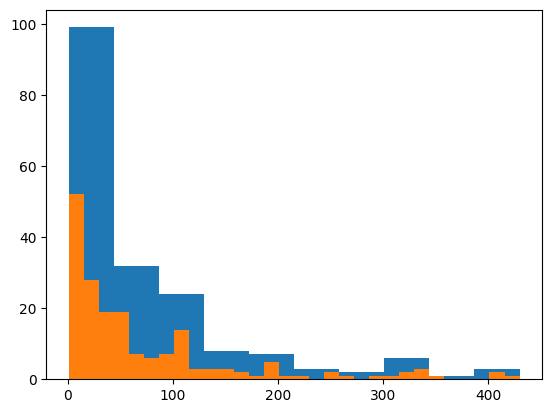

In [12]:
import matplotlib.pyplot as plt

plt.hist(review_strlength_list, bins = 10)
plt.hist(review_strlength_list, bins=30)
plt.show()

- 리뷰글의 길이를 히스토그램으로 만들어 보았다.
- 100자 이내로 쓰인 글이 제일 많았고 200자 이후로 적다.

{'whiskers': [<matplotlib.lines.Line2D at 0x278d5bcd710>,
 'caps': [<matplotlib.lines.Line2D at 0x278d5bcf150>,
 'boxes': [<matplotlib.lines.Line2D at 0x278d3a23810>],
 'medians': [<matplotlib.lines.Line2D at 0x278d5bdc190>],
 'fliers': [<matplotlib.lines.Line2D at 0x278d5bdca10>],
 'means': []}

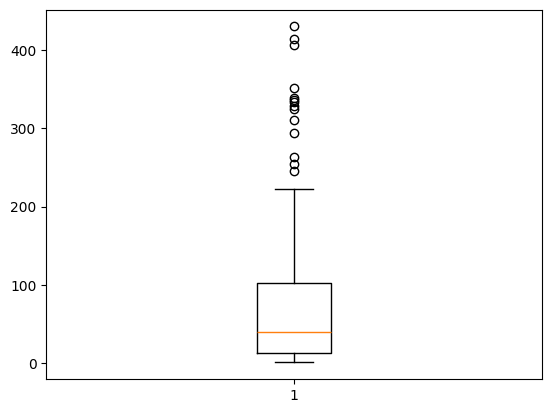

In [13]:
plt.boxplot(review_strlength_list)

- [이상치를 찾는 방법 1(IQR)](https://brain-nim.tistory.com/21)
- [이상치를 찾는 방법 2(z-score)](https://velog.io/@jihyunko/%EC%9D%B4%EC%83%81%EC%B9%98-%EC%89%BD%EA%B2%8C-%EC%B2%98%EB%A6%AC%ED%95%98%EA%B8%B0#z-score--z-frac-x_i-mu-sigma_x)

- IQR (Inter-Quartile Range)
- IQR = Q3(3사분위수) - Q1(1사분위수)
- 제거기준 = (Q3 + IQR * 1.5보다 큰 값) &(Q1 - IQR * 1.5보다 작은 값)

In [37]:
asceding_strlength = df_review_strlength.sort_values("리뷰 길이")

In [89]:
Q1 = df_review_strlength["리뷰 길이"].quantile(q=0.25)
Q3 = df_review_strlength["리뷰 길이"].quantile(q=0.75)

print(Q1)
print(Q3)

13.0
102.0


In [90]:
IQR = Q3 - Q1
print(IQR)

89.0


In [98]:
IQR_df = df_review_strlength[(df_review_strlength["리뷰 길이"] >= Q3 + 1.5 * IQR) | (df_review_strlength["리뷰 길이"] <= Q1 - 1.5*IQR)]

In [99]:
print(len(df_original_strlength))
print(len(IQR_df))

185
14


In [100]:
print(type(IQR_df))

<class 'pandas.core.frame.DataFrame'>


In [101]:
print(IQR_df)

     리뷰 길이
0      406
8      294
12     245
23     325
31     352
53     430
98     328
103    333
132    255
140    336
152    263
169    339
174    310
175    414


In [51]:
import matplotlib.pyplot as plt
font_path = 'C:/Users/pps/AppData/Local/Microsoft/Windows/Fonts/NanumBarunGothic.ttf'
font_name = plt.matplotlib.font_manager.FontProperties(fname=font_path).get_name()

plt.rcParams['font.family'] = font_name

<Axes: >

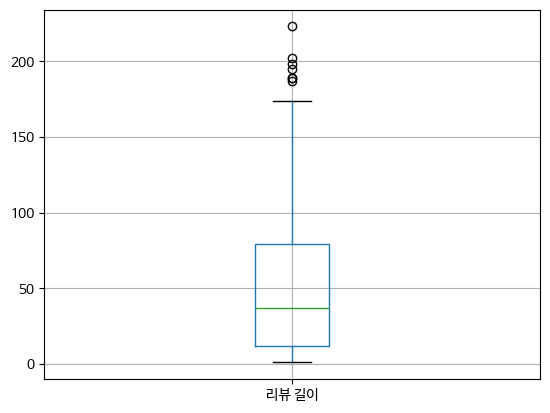

In [52]:
IQR_df.boxplot()

array([[<Axes: title={'center': '리뷰 길이'}>]], dtype=object)

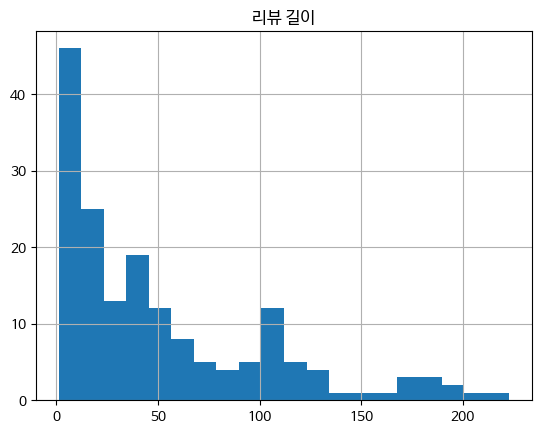

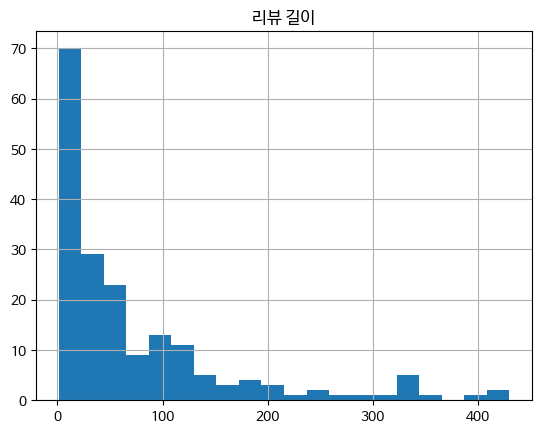

In [53]:
IQR_df.hist(bins=20)
df_review_strlength.hist(bins=20)

In [55]:
print(df_original_strlength)

     리뷰 길이
0      406
1      101
2       17
3      171
4      187
..     ...
180     98
181    189
182     51
183     46
184     24

[185 rows x 1 columns]


In [56]:
df_original_strlength[(abs((df_original_strlength["리뷰 길이"]-df_original_strlength["리뷰 길이"].mean())/df_original_strlength["리뷰 길이"].std())) > 1.96]

,리뷰 길이
0,406
8,294
23,325
31,352
53,430
98,328
103,333
132,255
140,336
152,263


In [58]:
outlier = df_original_strlength[(abs((df_original_strlength["리뷰 길이"]-df_original_strlength["리뷰 길이"].mean())/df_original_strlength["리뷰 길이"].std())) > 1.96].index

In [59]:
clean_df = df_original_strlength.drop(outlier)

In [62]:
clean_df

,리뷰 길이
1,101
2,17
3,171
4,187
5,17
...,...
180,98
181,189
182,51
183,46


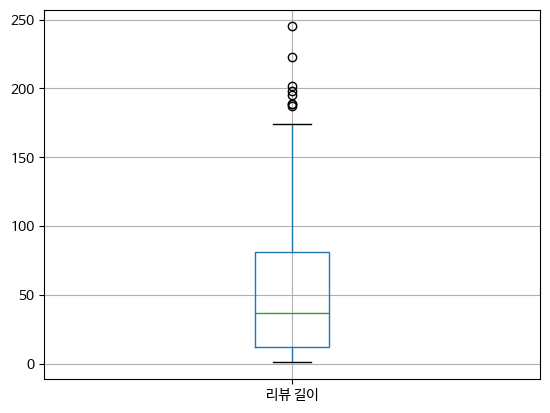

In [61]:
clean_df[["리뷰 길이"]].boxplot()
plt.show()

In [127]:
import pandas as pd

def find_reviewlength(df_reviews):
    review_strlength = {"리뷰 길이":[]}
    for i in range(len(df_reviews)):
        # 리뷰의 길이를 행마다 구하기
        temp_length = len(df_reviews["Review_Text"][i])
        review_strlength["리뷰 길이"].append(temp_length)
        
    df_temp_review_strlength = pd.DataFrame(review_strlength)
    return df_temp_review_strlength

# z-score를 통해 이상치를 찾는 함수
# def find_outlier(df_length_reviews, df_reviews):
#     outlier = df_length_reviews[(abs((df_length_reviews["리뷰 길이"]-df_length_reviews["리뷰 길이"].mean())/df_length_reviews["리뷰 길이"].std())) > 1.96].index
#     clean_df = df_reviews.drop(outlier)
#     return clean_df

# IQR을 이용한 이상치를 찾는 함수
def find_IQR(df_length_reviews,df_reviews):
    new_df_length = df_length_reviews.copy()
    new_df_reviews = df_reviews.copy()
    Q1 = new_df_length["리뷰 길이"].quantile(q=0.25)
    Q3 = new_df_length["리뷰 길이"].quantile(q=0.75)
    IQR = Q3 - Q1
    # IQR = Q3(3사분위수) - Q1(1사분위수)
    # 제거기준 = (Q3 + IQR * 1.5보다 큰 값) & (Q1 - IQR * 1.5보다 작은 값)
    IQR_df = new_df_length[(new_df_length["리뷰 길이"] >= Q3 + 1.5 * IQR) | (new_df_length["리뷰 길이"] <= Q1 - 1.5*IQR)].index
    print(IQR_df)
    new_df_reviews = new_df_reviews.drop('Unnamed: 0.1', axis = 1)
    new_df_reviews = new_df_reviews.drop('Unnamed: 0', axis = 1)
    
    new_df_reviews.drop(IQR_df, inplace = True)
    print(len(new_df_reviews))
    new_df_reviews.reset_index(drop=True, inplace = True)
    
    new_df_reviews.to_csv("./IQRtest.csv")
    return new_df_reviews
    

In [128]:
temp_reviews_spacing = pd.read_csv("C:/Users/pps/Desktop/Restaurant_Review/Data_Preprocessing/S_hotel_buffet_review_spacingcheck.csv")
df_temp_reviewlength = find_reviewlength(temp_reviews_spacing)
find_IQR(df_temp_reviewlength,temp_reviews_spacing)

Index([0, 8, 12, 23, 31, 53, 98, 103, 132, 140, 152, 169, 174, 175], dtype='int64')
171


,UserID,Review_Text,Date,NumberOfVisit
0,illiiilillil,직원 분들 너무 친절하시고 음식 맛은 대한민국 호텔 뷔페 넘버 원인데 말해 뭐 해입...,2024년 5월 19일 일요일,1번째 방문
1,shooooooo,종류도 알차게 많고 다 맛있어요,2024년 6월 7일 금요일,1번째 방문
2,Choigo다,신라호텔 파크뷰 조식 이용했습니다 11층이라 뷰도 훌륭하고 객실 컨디션이나 청결 서...,2024년 3월 3일 일요일,1번째 방문
3,shekyh,창가 자리는 보기만 하고 부스 좌석 안내받음 안락하고 좋았어요 대게는 차갑고 짜고 ...,2024년 2월 3일 토요일,1번째 방문
4,이진욱쨩,항상 친절하시고 음식도 맛있네요,2024년 4월 21일 일요일,2번째 방문
...,...,...,...,...
166,sj5****,양 갈비가 제일 맛있어요 La갈비 맛있었는데 없어져서 아쉬워요 주말에 1부는 시간이...,2022년 9월 18일 일요일,1번째 방문
167,마츠코,가격 오르고 가성비 떨어진다는 데 처음 와본 사람으로서 이전에 어땠는지 모르겠지만 ...,2022년 8월 24일 수요일,1번째 방문
168,디기디기디기갱갱,가격은 있지만 특별한 날 가기 좋아요 개인적으로 해산물보다는 디저트 육류 순으로 맛...,2022년 10월 10일 월요일,1번째 방문
169,캠퍼필즈,음식이 다양하고 전반적으로 다 맛있어요 무엇보다 다들 친절하고 서비스가 너무 좋아요,2022년 6월 18일 토요일,1번째 방문


---

- 신조어 처리
- ***신조어 처리를 하지 않겠음***

In [133]:
# from soynlp.tokenizer import RegexTokenizer
# tokenizer = RegexTokenizer()
# print(tokenizer.tokenize('체고'))


In [150]:
from konlpy.tag import Okt

okt = Okt()
# okt.pos("저의 최애 메뉴는 짜장면입니다.")
# okt.pos("이영화존잼쓰ㅋㅋㅋㅋ")
okt.pos("좋댓구알")

[('좋', 'Adjective'), ('댓', 'Modifier'), ('구', 'Modifier'), ('알', 'Noun')]

In [136]:
from soynlp.normalizer import emoticon_normalize
print(emoticon_normalize("앜ㅋㅋㅋ이영화존잼쓰ㅠㅠ"))

아ㅋㅋ영화존잼쓰ㅠㅠ


In [ ]:
from soynlp.word import WordExtractor

word_extractor = WordExtractor(
    min_frequency=100,
    min_cohesion_forward=0.05,
    min_right_branching_entropy=0.0
)

---